In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, mode
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['source'] = 'train'
test['source'] = 'test'

df = pd.concat([train, test])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


# <font color = 'gold'> Data Exploration </font>


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [3]:
df.isnull().sum() / df.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In this situation we have 2 options: remove the rolls that have missing data or we can threat them. </br>
We're gone threat them with:

Item_weight - apply the mean or median Item_weight of the dataset. We are going to check it later</br>
Outlet_size - apply the mode of the value of this variable. It's a qualitative variable. <br>
Item_outlet_sales - in this case we don't need to do anything. We are already going to predict the value 

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# item_identifier

df.Item_Identifier.nunique()

1559

In [6]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [7]:
df.Item_Type.value_counts(normalize = True) * 100

Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: Item_Type, dtype: float64

In [8]:
df.Outlet_Identifier.nunique()

10

In [9]:
df.Outlet_Size.value_counts(normalize=True) * 100

Medium    45.691009
Small     39.065567
High      15.243424
Name: Outlet_Size, dtype: float64

In [10]:
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [11]:
df.Outlet_Type.value_counts(normalize = True)

Supermarket Type1    0.654323
Grocery Store        0.127077
Supermarket Type3    0.109758
Supermarket Type2    0.108843
Name: Outlet_Type, dtype: float64

In [12]:
numeric_variables = [col for col in df.columns if df[col].dtypes != 'object']

Variável:  Item_Weight
Variável:  Item_Visibility
Variável:  Item_MRP
Variável:  Outlet_Establishment_Year
Variável:  Item_Outlet_Sales


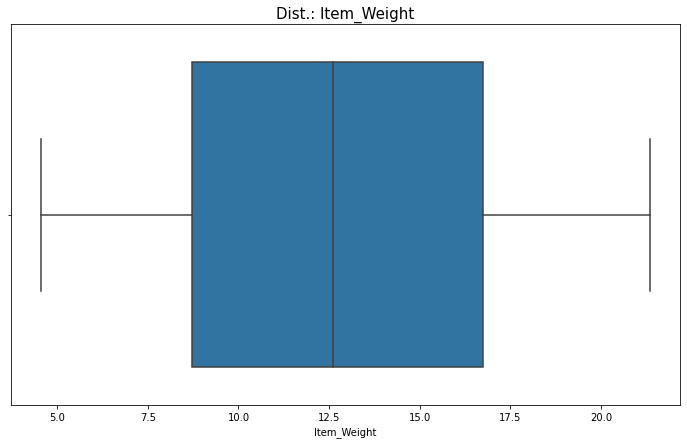

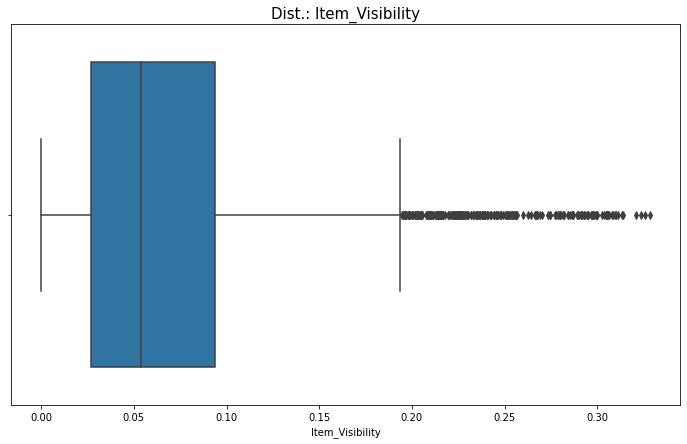

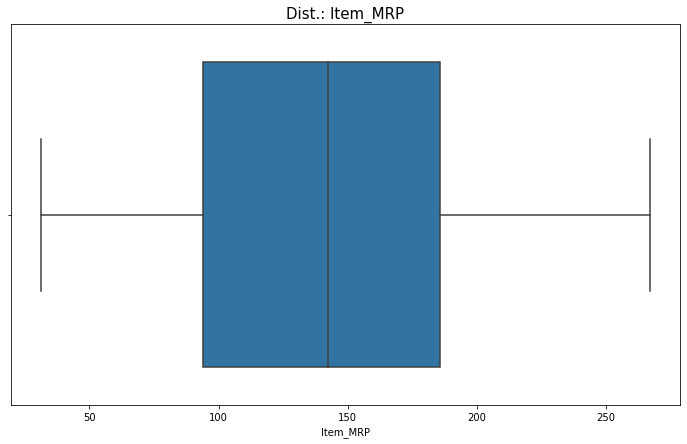

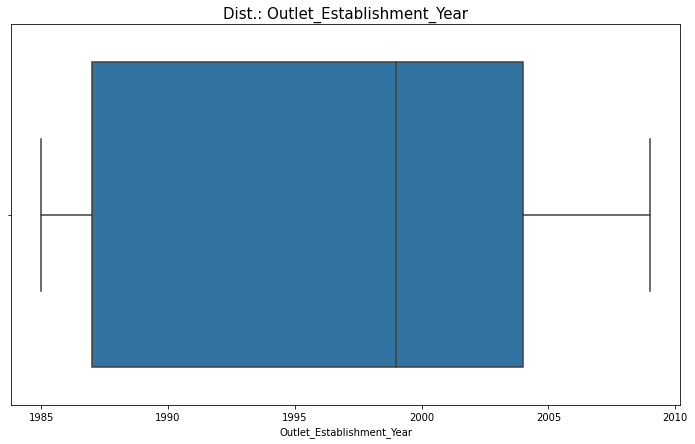

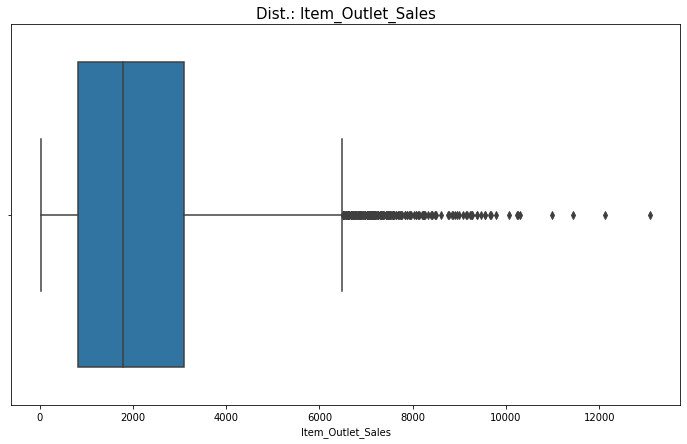

In [13]:
for v in numeric_variables:
    print('Variável: ', v)
    plt.figure(figsize = (12, 7))
    sns.boxplot(data = df, x = v)
    title = 'Dist.: ' + v
    plt.title(title, fontsize = 15) 

# <font color = 'gold'> Data Cleaning </font>


In [14]:
# Item_Weight imputando a média para esta variável

missing_numeric = SimpleImputer(missing_values = np.nan, strategy = 'mean')

df_numeric = df.select_dtypes(include = [np.number]).drop(columns = ['Item_Outlet_Sales'])

missing_numeric.fit(df_numeric)
data_numerical = missing_numeric.transform(df_numeric)

data_numerical = pd.DataFrame(data_numerical, columns = df_numeric.columns)

In [15]:
# Outlet_Size imputando a média para esta variável

missing_categorical = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df_categorical = df.select_dtypes(include = 'object')

missing_categorical.fit(df_categorical)
data_categorical = missing_categorical.transform(df_categorical)

data_categorical = pd.DataFrame(data = data_categorical, columns = df_categorical.columns)

In [16]:
df_model = pd.concat([data_numerical, data_categorical], axis = 1)

df_model['Item_Outlet_Sales'] = df.Item_Outlet_Sales.values

order_cols = df.columns
df_model = df_model[order_cols]

# <font color = 'gold'> Feature Engineering </font>

In [18]:
df_model.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,train
